In [1]:
import numpy as np
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Preprocessed Text: 
patient john doe 45 years old diagnosed with type 2 diabetes complains of
frequent urination fatigue and increased thirst prescribed metformin 500mg
daily scheduled followup in 3 months

Extracted Entities: [('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500', 'CARDINAL'), ('daily', 'DATE'), ('3 months', 'DATE')]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment Analysis Result: {'label': 'NEGATIVE', 'score': 0.9900931715965271}


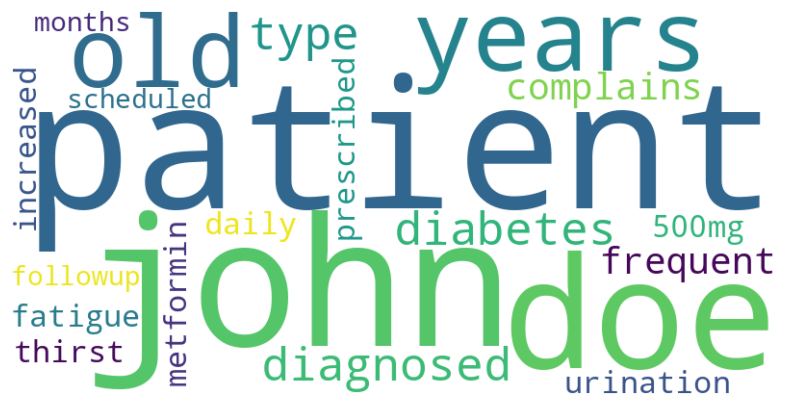


Extracted Patient Insights:
{'Key Entities': [('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500', 'CARDINAL'), ('daily', 'DATE'), ('3 months', 'DATE')], 'Overall Sentiment': 'NEGATIVE', 'Sentiment Score': 0.9900931715965271}


In [2]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load sample medical text data
medical_text = """
Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of
frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg
daily. Scheduled follow-up in 3 months.
"""

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

clean_text = preprocess_text(medical_text)
print("Preprocessed Text:", clean_text)

# Named Entity Recognition (NER) using spaCy
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities = extract_entities(medical_text)
print("Extracted Entities:", entities)

# Sentiment Analysis using Transformers
sentiment_pipeline = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]  # Get the first result from pipeline output
    return {"label": result['label'], "score": result['score']}

sentiment_result = analyze_sentiment(medical_text)
print("Sentiment Analysis Result:", sentiment_result)

# Word Cloud Generation
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(clean_text)

# Extracting Insights
def extract_insights(entities, sentiment_result):
    insights = {
        "Key Entities": entities,
        "Overall Sentiment": sentiment_result['label'],
        "Sentiment Score": sentiment_result['score']
    }
    return insights

insights = extract_insights(entities, sentiment_result)
print("\nExtracted Patient Insights:")
print(insights)